In [32]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns


In [3]:
df=pd.read_csv("flights2018.csv",sep=",")

In [4]:
df.shape

(7213446, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [6]:
df.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [22]:
#checking missing values 
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

[Text(0.5, 1.0, 'Distribution of Delated Flights')]

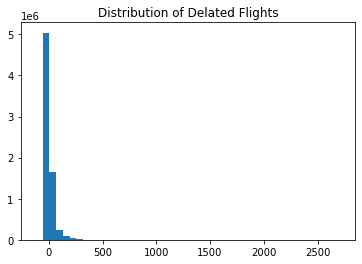

In [24]:
#Distribution of delayed flights 
plt.hist(df.DEP_DELAY, bins=45)
plt.gca().set(title='Distribution of Delated Flights')


In [29]:
df.DEP_DELAY.describe()

count    7.096212e+06
mean     9.969858e+00
std      4.482964e+01
min     -1.220000e+02
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      2.710000e+03
Name: DEP_DELAY, dtype: float64

Preliminary analysis: above chart presents a highly skewed distribution. One possible problem stemming from the nature of the dataset is that when we attempt to fit a classification model to predict delayed time, the predicted result tends to converge to the mode of the dataset. 

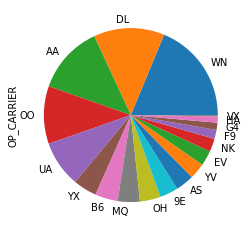

In [28]:
df.OP_CARRIER.value_counts(normalize=True).plot.pie()
plt.show()

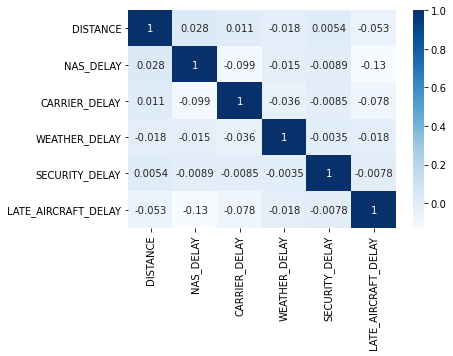

In [51]:
df[['DISTANCE','NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].corr()
sns.heatmap(df[['DISTANCE','NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].corr(), annot=True, cmap = 'Blues')
plt.show()


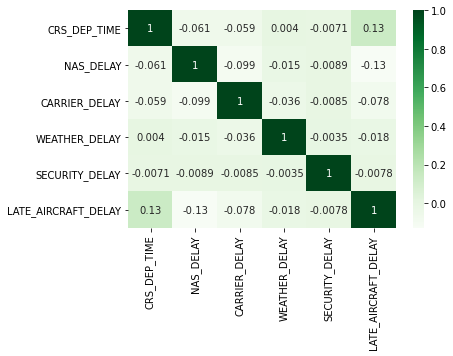

In [52]:
df[['CRS_DEP_TIME','NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].corr()
sns.heatmap(df[['CRS_DEP_TIME','NAS_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].corr(), annot=True, cmap = 'Greens')
plt.show()

In [57]:
#Explore on the subset which delayed time is positive -- the actual delayed flights
df[(df.DEP_DELAY >= 0)]
df.groupby(['ORIGIN','OP_CARRIER']).size()

# this shows the number of flights in each origin operated by each carrier  


ORIGIN  OP_CARRIER
ABE     9E             352
        DL             363
        EV             470
        G4             912
        OH             997
                      ... 
XNA     YV             225
        YX            1431
YAK     AS             722
YNG     G4               2
YUM     OO            1376
Length: 1967, dtype: int64